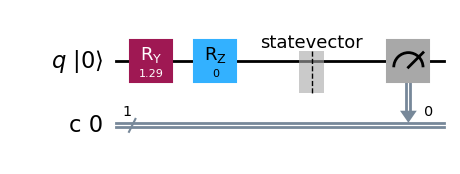

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex, plot_state_qsphere, plot_bloch_multivector
from numpy import pi
import numpy as np

# Vecteur à encoder
a, b = 0.8, 0.6  # Exemple de valeurs pour |v> = a|0> + b|1>
norm = np.sqrt(a**2 + b**2)
a, b = a / norm, b / norm  # Normalisation

# Initialiser le circuit quantique avec 1 qubit
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# encoder |v> = cos(θ/2)|0> + e^(iφ)sin(θ/2)|1>
theta = 2 * np.arccos(a)
phi = np.angle(b + 0j)

circuit.ry(theta, 0)
circuit.rz(phi, 0)

#sauvegarder l'etat avant la mesure
circuit.save_statevector()

circuit.measure(qreg_q,creg_c)

#afficher le circuit
circuit.draw('mpl',initial_state=True,style='iqp')


Total counts are: {'0': 652, '1': 348}


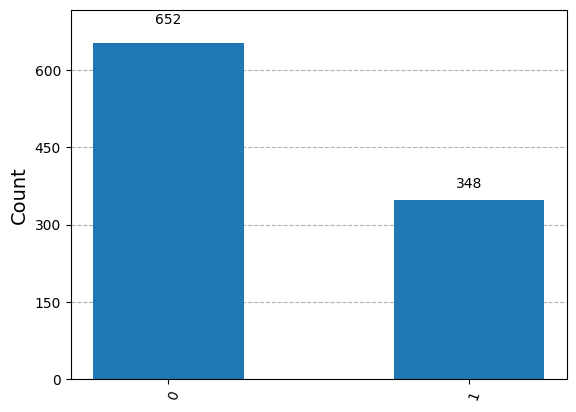

In [2]:
# Utiliser le simulateur
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:", counts)

# Visualiser les résultats de mesure
plot_histogram(counts)

In [3]:
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

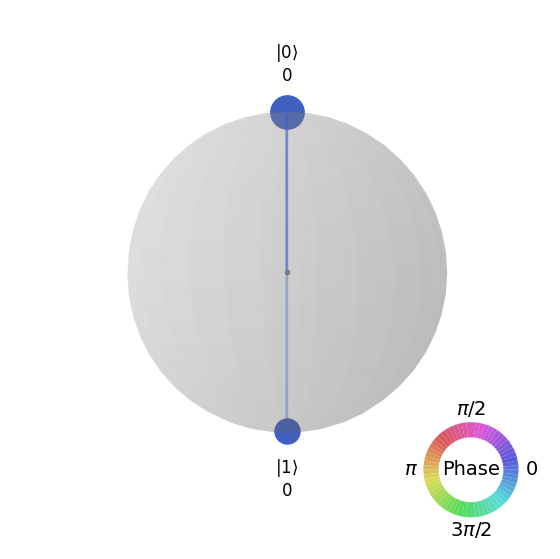

In [4]:
plot_state_qsphere(statevector, show_state_phases=True)

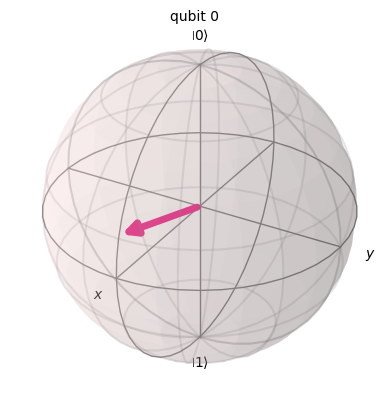

In [5]:
plot_bloch_multivector(statevector)